In [8]:
#setup
getwd()
required_packages = c("tidyverse","stringr","lubridate","xlsx","forcats","RColorBrewer","scales")
lapply(required_packages, require, character.only = TRUE)
load("dataset.RData")

[1] "D:/Working_Space/R_Working/Autodesk_Adoption/first_week_report"

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

In [10]:
#Get data for plotting
data <- dataset %>%
    filter(contract_status == "Active" & !is.na(product_name) & dt == "2017-10-21") %>%
    group_by(entitlement_model,product_line_code,owner_id) %>%
    summarise(count = length(unique(product_name))) %>%
    ungroup() %>%
    mutate(product_owned = if_else(count == 1,1,
                                  if_else(count == 2,2,
                                         3))) %>%
    group_by(entitlement_model,product_line_code,product_owned) %>%
    summarise(count_all = n()) %>%
    mutate(total_users = sum(count_all), pct_users = count_all/total_users) %>%
    ungroup() %>%
    mutate(product_line_code = fct_recode(product_line_code,AEC = "AECCOL", "M&E" = "MECOLL", "PDM" = "PDCOLL")) %>%
    select(entitlement_model,product_line_code,product_owned,pct_users) %>%
    ungroup();data

final_results <- data %>% 
    mutate(pct_char = str_c(format(100*pct_users,digits = 0),"%"),
           product_owned = fct_recode(as.factor(product_owned),"1" = "1", "2" = "2", "3+" = "3"));final_results

plot_data <- final_results %>%
    mutate(length_y = 1) %>%
    mutate(product_owned = fct_rev(product_owned),
           y_text = if_else(product_owned == "1","1 Product",
                            if_else(product_owned == "2","2 Product","3+ Product")),
           y_position = if_else(product_owned == "1", 0.5,
                                if_else(product_owned == "2", 1.5, 2.5)));plot_data

entitlement_model,product_line_code,product_owned,pct_users
Subscription Multi User,AEC,1,0.3362878
Subscription Multi User,AEC,2,0.2937956
Subscription Multi User,AEC,3,0.3699166
Subscription Multi User,M&E,1,0.5633803
Subscription Multi User,M&E,2,0.3239437
Subscription Multi User,M&E,3,0.1126761
Subscription Multi User,PDM,1,0.3718772
Subscription Multi User,PDM,2,0.4225553
Subscription Multi User,PDM,3,0.2055675
Subscription Single User,AEC,1,0.4367150


entitlement_model,product_line_code,product_owned,pct_users,pct_char
Subscription Multi User,AEC,1,0.3362878,34%
Subscription Multi User,AEC,2,0.2937956,29%
Subscription Multi User,AEC,3+,0.3699166,37%
Subscription Multi User,M&E,1,0.5633803,56%
Subscription Multi User,M&E,2,0.3239437,32%
Subscription Multi User,M&E,3+,0.1126761,11%
Subscription Multi User,PDM,1,0.3718772,37%
Subscription Multi User,PDM,2,0.4225553,42%
Subscription Multi User,PDM,3+,0.2055675,21%
Subscription Single User,AEC,1,0.4367150,44%


entitlement_model,product_line_code,product_owned,pct_users,pct_char,length_y,y_text,y_position
Subscription Multi User,AEC,1,0.3362878,34%,1,1 Product,0.5
Subscription Multi User,AEC,2,0.2937956,29%,1,2 Product,1.5
Subscription Multi User,AEC,3+,0.3699166,37%,1,3+ Product,2.5
Subscription Multi User,M&E,1,0.5633803,56%,1,1 Product,0.5
Subscription Multi User,M&E,2,0.3239437,32%,1,2 Product,1.5
Subscription Multi User,M&E,3+,0.1126761,11%,1,3+ Product,2.5
Subscription Multi User,PDM,1,0.3718772,37%,1,1 Product,0.5
Subscription Multi User,PDM,2,0.4225553,42%,1,2 Product,1.5
Subscription Multi User,PDM,3+,0.2055675,21%,1,3+ Product,2.5
Subscription Single User,AEC,1,0.4367150,44%,1,1 Product,0.5


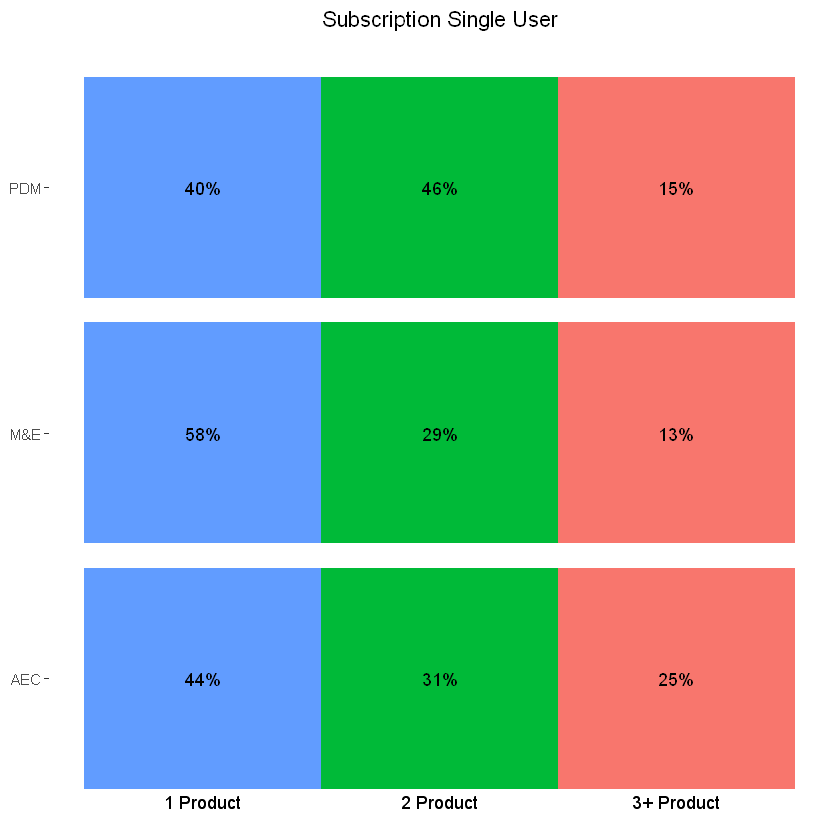

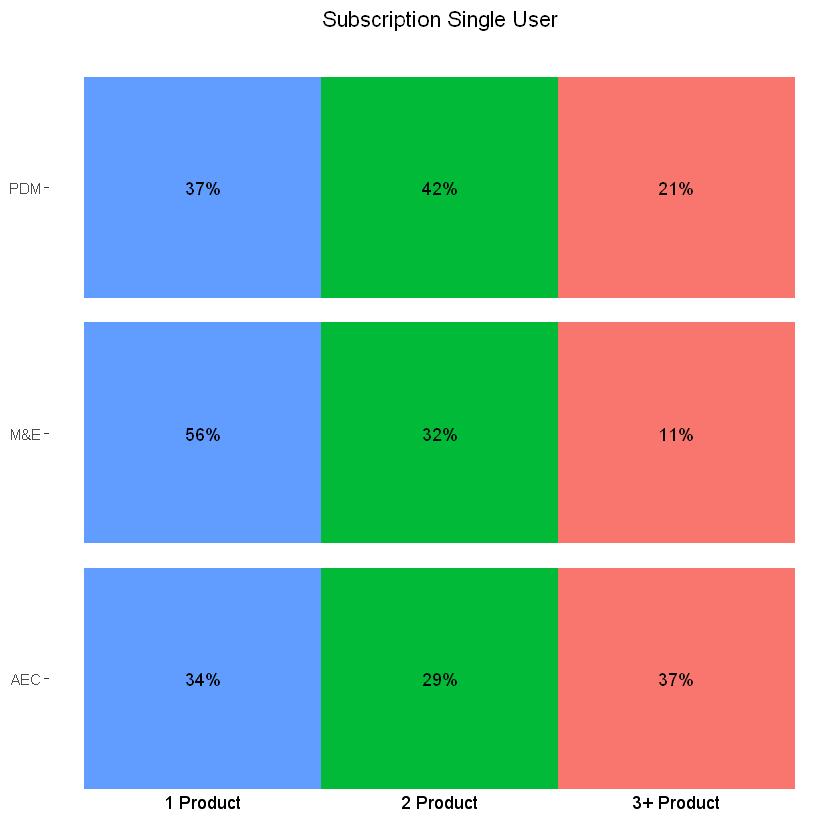

In [11]:
#Plot single user
plot_data %>%
    filter(entitlement_model == "Subscription Single User") %>%
    ggplot() +
    geom_col(mapping = aes(x = product_line_code, y = length_y,fill = product_owned),position = "stack") +
    geom_text(mapping = aes(x = product_line_code, y = y_position, label = pct_char)) + 
    geom_text(mapping = aes(x = 0.5, y = y_position, label = y_text)) +
    coord_flip() +
    labs(title = "Subscription Single User") +
    #edit theme
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.title.y = element_blank()) +
    theme(panel.background = element_rect(fill = "white", colour = "white"))

#Plot multi user
plot_data %>%
    filter(entitlement_model == "Subscription Multi User") %>%
    ggplot() +
    geom_col(mapping = aes(x = product_line_code, y = length_y,fill = product_owned),position = "stack") +
    geom_text(mapping = aes(x = product_line_code, y = y_position, label = pct_char)) + 
    geom_text(mapping = aes(x = 0.5, y = y_position, label = y_text)) +
    coord_flip() +
    labs(title = "Subscription Single User") +
    #edit theme
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(legend.position="none") +
    theme(axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.title.y = element_blank()) +
    theme(panel.background = element_rect(fill = "white", colour = "white"))
